### https://keras.io/applications/
### https://github.com/keras-team/keras-applications

#####  additional https://github.com/machrisaa/tensorflow-vgg
##### data https://www.kaggle.com/c/dogs-vs-cats
##### https://www.microsoft.com/en-us/download/details.aspx?id=54765

In [1]:
import tensorflow as tf
from tensorflow.keras import applications
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import os
import matplotlib.pyplot as plt

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam


Number of Cat images -  12500
dog.4632.jpg


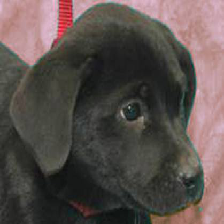

In [3]:
img_dir = "../data/cat_dog_data/train"
dogImages = os.listdir(img_dir + "/Dog")
print("Number of Cat images - ",str(len(dogImages)))
print(dogImages[1])

#img_path = 'elephant.jpg'
img = image.load_img(img_dir + "/Dog/"+ dogImages[1], target_size=(224, 224))
x = image.img_to_array(img)

img

In [4]:
print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)

(224, 224, 3)
(1, 224, 224, 3)


In [5]:
from tensorflow.keras.layers import Input
input_tensor = Input(shape=(224, 224, 3))
vgg_model = applications.VGG16(weights='imagenet',
                               include_top=False,
                               input_tensor=input_tensor)

In [6]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [7]:
# Creating dictionary that maps layer names to the layers
layer_dict = dict([(layer.name, layer) for layer in vgg_model.layers])

In [8]:
layer_dict

{'input_1': <tensorflow.python.keras.engine.input_layer.InputLayer at 0x7f301e4b75b0>,
 'block1_conv1': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f301e4b7640>,
 'block1_conv2': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f301c3efc40>,
 'block1_pool': <tensorflow.python.keras.layers.pooling.MaxPooling2D at 0x7f301e470df0>,
 'block2_conv1': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f301c3ae5b0>,
 'block2_conv2': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f301c3b4310>,
 'block2_pool': <tensorflow.python.keras.layers.pooling.MaxPooling2D at 0x7f301c3a64f0>,
 'block3_conv1': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f301c3bba60>,
 'block3_conv2': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f301c3c3790>,
 'block3_conv3': <tensorflow.python.keras.layers.convolutional.Conv2D at 0x7f301c346b20>,
 'block3_pool': <tensorflow.python.keras.layers.pooling.MaxPooling2D at 0x7f301c3c3760>,
 'block4_conv1':

In [9]:
print(len(layer_dict))

19


In [10]:
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten

In [11]:
x = layer_dict['block5_pool'].output
x = Flatten()(x)
x = Dense(256, activation=K.relu)(x)
x = Dropout(0.5)(x)
x = Dense(2, activation=K.softmax)(x)

In [12]:
from tensorflow.keras.models import Model

In [13]:
custom_model = Model(inputs=vgg_model.input, outputs=x)

In [14]:
# Make sure that the pre-trained bottom layers are not trainable
for layer in custom_model.layers[:19]:
    layer.trainable = False

#### folder - "C:/Users/thisi/Workspace/AI_dataset/dog_vs_cat/dataset/training_set/", inside the folder, there must be a folder for each class of data containing the corresponding images. The names of the folders must be the names of their respective classes.

In [16]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('../data/cat_dog_data/train',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=64,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 25000 images belonging to 2 classes.


In [17]:
label_map = (train_generator.class_indices)
print(label_map)

{'Cat': 0, 'Dog': 1}


In [18]:
custom_model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

custom_model.fit(train_generator, epochs=2)

Epoch 1/2
391/391 [==============================] - 3860s 10s/step - loss: 2.5589 - accuracy: 0.9421
Epoch 2/2
391/391 [==============================] - 3463s 9s/step - loss: 0.0931 - accuracy: 0.9755


In [26]:
custom_model.save('./model/vgg16_cat_dot_clf.h5')
#new_model = keras.models.load_model('path_to_my_model.h5')

In [20]:
def get_image_matrix(img_name_list, folder):
    ret_arr = np.zeros((1,224,224,3))
    for img_name in img_name_list:
        img = image.load_img(img_dir + "/"+folder+"/"+ img_name, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        ret_arr = np.append(ret_arr, x, axis=0)
    ret_arr = np.delete(ret_arr, 0, axis=0)
    return ret_arr    

In [21]:
img_arr = get_image_matrix(['dog.14.jpg', 'dog.28.jpg', 'dog.31.jpg'], 'Dog')

print(img_arr)

[[[[ 87.  95.  98.]
   [ 85.  90.  93.]
   [ 78.  83.  86.]
   ...
   [151. 152. 157.]
   [153. 154. 159.]
   [134. 135. 140.]]

  [[ 81.  89.  91.]
   [ 81.  86.  89.]
   [ 88.  94.  94.]
   ...
   [138. 139. 144.]
   [144. 145. 150.]
   [133. 134. 139.]]

  [[ 68.  73.  76.]
   [ 86.  92.  92.]
   [ 70.  74.  75.]
   ...
   [141. 142. 147.]
   [144. 145. 150.]
   [147. 148. 153.]]

  ...

  [[133. 134. 136.]
   [141. 142. 144.]
   [101. 102. 104.]
   ...
   [114. 117. 122.]
   [105. 109. 112.]
   [103. 107. 110.]]

  [[119. 120. 122.]
   [130. 131. 133.]
   [218. 219. 221.]
   ...
   [121. 124. 129.]
   [152. 156. 157.]
   [131. 135. 136.]]

  [[151. 147. 148.]
   [144. 140. 141.]
   [165. 163. 164.]
   ...
   [ 97. 104. 114.]
   [141. 143. 142.]
   [131. 133. 132.]]]


 [[[ 88.  97. 102.]
   [ 87.  96. 101.]
   [ 84.  93.  98.]
   ...
   [ 91. 102.  96.]
   [ 93. 104.  98.]
   [ 91. 102.  96.]]

  [[ 76.  85.  90.]
   [ 76.  85.  90.]
   [ 77.  86.  91.]
   ...
   [ 93. 104. 100.]
 

In [22]:
print(img_arr.shape)

(3, 224, 224, 3)


In [23]:
img_arr = preprocess_input(img_arr)

In [24]:
print(img_arr.shape)

(3, 224, 224, 3)


In [25]:
from tensorflow import keras

In [27]:
model = keras.models.load_model('./model/vgg16_cat_dot_clf.h5')

In [28]:
output = model.predict(img_arr)

In [29]:
print(output)

[[5.4919223e-21 1.0000000e+00]
 [5.3804693e-11 1.0000000e+00]
 [8.3992813e-17 1.0000000e+00]]


In [30]:
np.argmax(output, axis=1)

array([1, 1, 1])

In [32]:
cat_img_arr = get_image_matrix(['cat.40.jpg', 'cat.118.jpg', 'cat.228.jpg'], 'Cat')
img_arr = preprocess_input(cat_img_arr)
print(np.argmax(model.predict(img_arr), axis=1))

[0 0 0]


https://towardsdatascience.com/keras-transfer-learning-for-beginners-6c9b8b7143e

https://medium.com/@14prakash/transfer-learning-using-keras-d804b2e04ef8

https://www.learnopencv.com/keras-tutorial-transfer-learning-using-pre-trained-models/

In [ ]:
def my_gen():
    for i in range(10):
        yield i

# Using for loop
for item in my_gen():
    print(item)  

In [ ]:
def my_gen():
    for i in range(10):
        return i

# Using for loop
for item in my_gen():
    print(item)